<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Mevsimsellik, Tatil Etkileri ve Regresyonlar 🎉</h2>
    <h3 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Tatil ve Özel Etkinliklerin Modellenmesi</h3>
    Modellemeniz gereken tatiller veya düzenli olarak tekrar eden özel etkinlikler varsa, bu olayları doğru bir şekilde modellemek için bir veri çerçevesi oluşturmanız gerekmektedir. Bu veri çerçevesi, aşağıdaki iki sütunu içermelidir:<br>
<ul>
        <li><strong>holiday</strong>: Tatilin adı veya etkinliğin adı. 🏖️</li>
        <li><strong>ds</strong>: Tatilin veya etkinliğin gerçekleştiği tarih. 📆</li>
</ul>

Her tatil için bir satır bulunmalıdır. Bu satırlar, tatilin geçmişteki tüm gerçekleşmelerini (verilerin mevcut olduğu kadar) ve gelecekteki tüm gerçekleşmelerini (tahminin yapılacağı kadar) kapsamalıdır. Eğer tatil gelecekte tekrar etmeyecekse, Prophet bu tatili modelleyecek ve gelecekteki tahminde yer vermeyecektir.

<h3 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Tatil Etkilerinin Genişletilmesi 📈</h3>
    Ayrıca, tatilin etkisinin sadece belirli bir günle sınırlı kalmayıp etrafındaki günleri de kapsayacak şekilde modellemek istiyorsanız, şu ek sütunları kullanabilirsiniz:<br>
 <ul>
        <li><strong>lower_window</strong>: Tatilin etkisinin başlamasından önceki günleri belirler. Örneğin, Noel Arifesi'ni de dahil etmek isterseniz, <strong>lower_window=-1</strong> olarak ayarlayabilirsiniz. 🎄</li>
        <li><strong>upper_window</strong>: Tatilin etkisinin sona erdiği günleri belirler. Örneğin, Kara Cuma'yı dahil etmek için <strong>upper_window=1</strong> olarak ayar yapabilirsiniz. 🛍️</li>
    </ul>

Bu iki sütun, tatil olayının etrafındaki günlere de etki ekleyerek daha geniş bir zaman aralığını kapsar. Bu ayarları kullanarak, modelde tatil etkilerini daha doğru bir şekilde yansıtabilirsiniz.

<h3 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Tatil Etkisini Özelleştirme</h3>

Ek olarak, tatiller için farklı bir <strong>prior_scale</strong> değeri de belirleyebilirsiniz. Bu, tatilin model üzerindeki etkisini ayarlamanıza olanak tanır. Tatilin etkisini daha güçlü ya da daha zayıf yapmak için <strong>prior_scale</strong> değerini değiştirebilirsiniz.
</font>
</font>


In [45]:
import pandas as pd
from prophet import Prophet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Burada, Peyton Manning’in tüm playoff maçlarının tarihlerini içeren bir veri çerçevesi (dataframe) oluşturuyoruz:
</font>

In [47]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Yukarıda, Superbowl günlerini hem playoff maçları (eleme maçları) hem de Superbowl maçları (final maçları) olarak ele aldık. Bu yaklaşım, Superbowl etkisinin, playoff etkisine ek olarak ekstra bir katkı sağlamasına olanak tanır.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Tablo oluşturulduktan sonra, tatil etkileri, <strong>holidays</strong> argümanı kullanılarak tahmine dahil edilir. Burada bunu, Quickstart’tan alınan Peyton Manning verileriyle gerçekleştiriyoruz:
</font>

In [48]:
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

01:47:47 - cmdstanpy - INFO - Chain [1] start processing
01:47:47 - cmdstanpy - INFO - Chain [1] done processing


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Tatil etkisi, tahmin edilen verilerin bulunduğu veri çerçevesinde (<strong>forecast dataframe</strong>) gözlemlenebilir:
</font>

In [49]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.228031,1.201321
2191,2014-02-03,1.901884,1.451541
2532,2015-01-11,1.228031,0.000000
2533,2015-01-12,1.901884,0.000000
2901,2016-01-17,1.228031,0.000000
2902,2016-01-18,1.901884,0.000000
2908,2016-01-24,1.228031,0.000000
2909,2016-01-25,1.901884,0.000000
2922,2016-02-07,1.228031,1.201321
2923,2016-02-08,1.901884,1.451541


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Tatil etkileri, <strong>components</strong> grafiğinde de kendini gösterir. Bu grafikte, playoff maçlarının olduğu günlerin etrafında bir yükselme olduğu ve özellikle Superbowl günü için büyük bir zirve gözlemlendiği görülebilir.
</font>


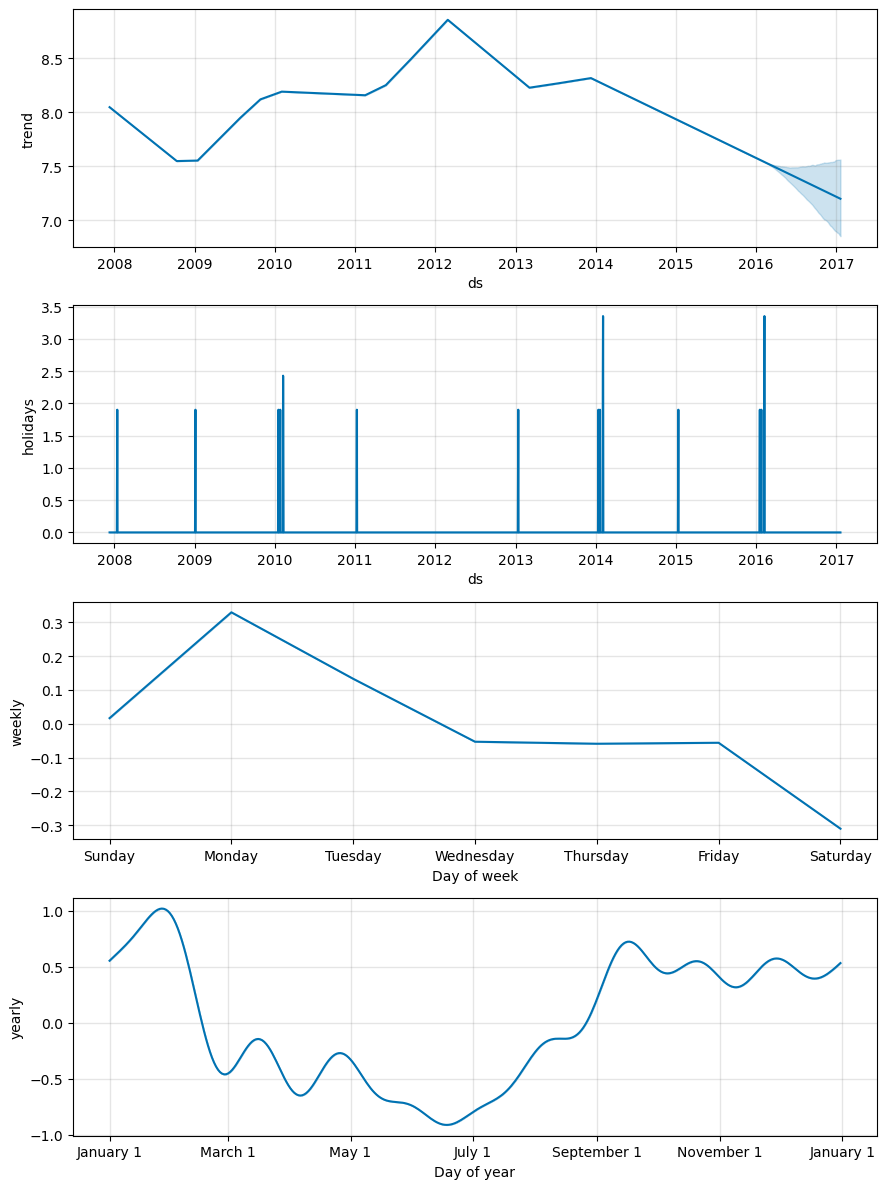

In [50]:
fig = m.plot_components(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Bireysel tatiller, <strong>plot_forecast_component</strong> fonksiyonu (Python'da prophet.plot'tan içe aktarılır) kullanılarak görselleştirilebilir. 🎉 Örneğin, yalnızca Superbowl tatil bileşenini görmek için <strong>plot_forecast_component(m, forecast, 'superbowl')</strong> fonksiyonu kullanılabilir. 🏈 Aşağıdaki örnekte bunu nasıl yapabileceğinizi görebilirsiniz:
</font>

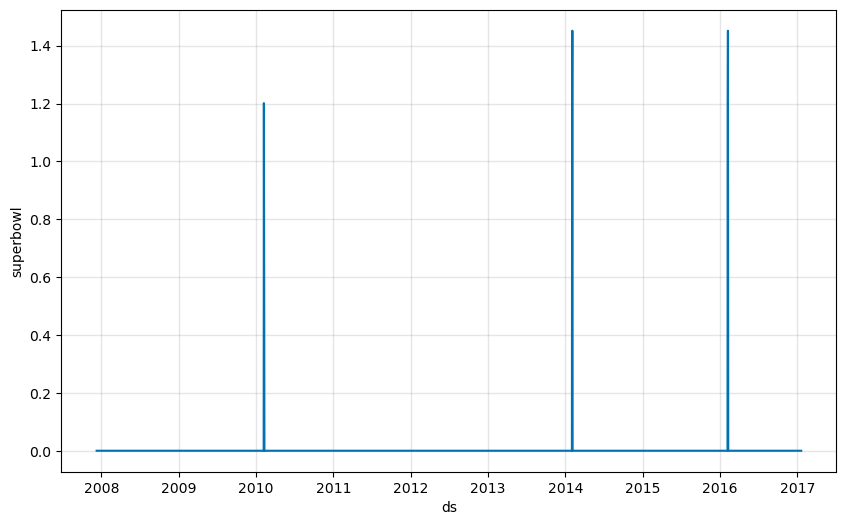

In [51]:
from prophet.plot import plot_forecast_component
plot_forecast_component(m, forecast, 'superbowl') 

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Yerleşik Ülke Tatilleri</strong> 🌍</h2>
    <strong>add_country_holidays</strong> metodu, ülkeye özel tatil koleksiyonlarını kolayca dahil edebilirsiniz. 🎉 Ülkenin adı belirtildiğinde, o ülkenin büyük tatilleri, yukarıda bahsedilen <strong>holidays</strong> argümanı ile eklenen tatillere ilave olarak otomatik olarak dahil edilir. 🇺🇸
</font>

In [52]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

01:47:50 - cmdstanpy - INFO - Chain [1] start processing
01:47:50 - cmdstanpy - INFO - Chain [1] done processing


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Hangi tatillerin dahil edildiğini, modelin <strong>train_holiday_names</strong> özelliğine bakarak görebilirsiniz:
</font>

In [53]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12        Veterans Day (observed)
13    Independence Day (observed)
14      New Year's Day (observed)
dtype: object

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    Yukarıda belirtildiği gibi, ülke düzeyindeki tatiller <strong>components</strong> grafiğinde görüntülenmeye başlayacaktır:
</font>

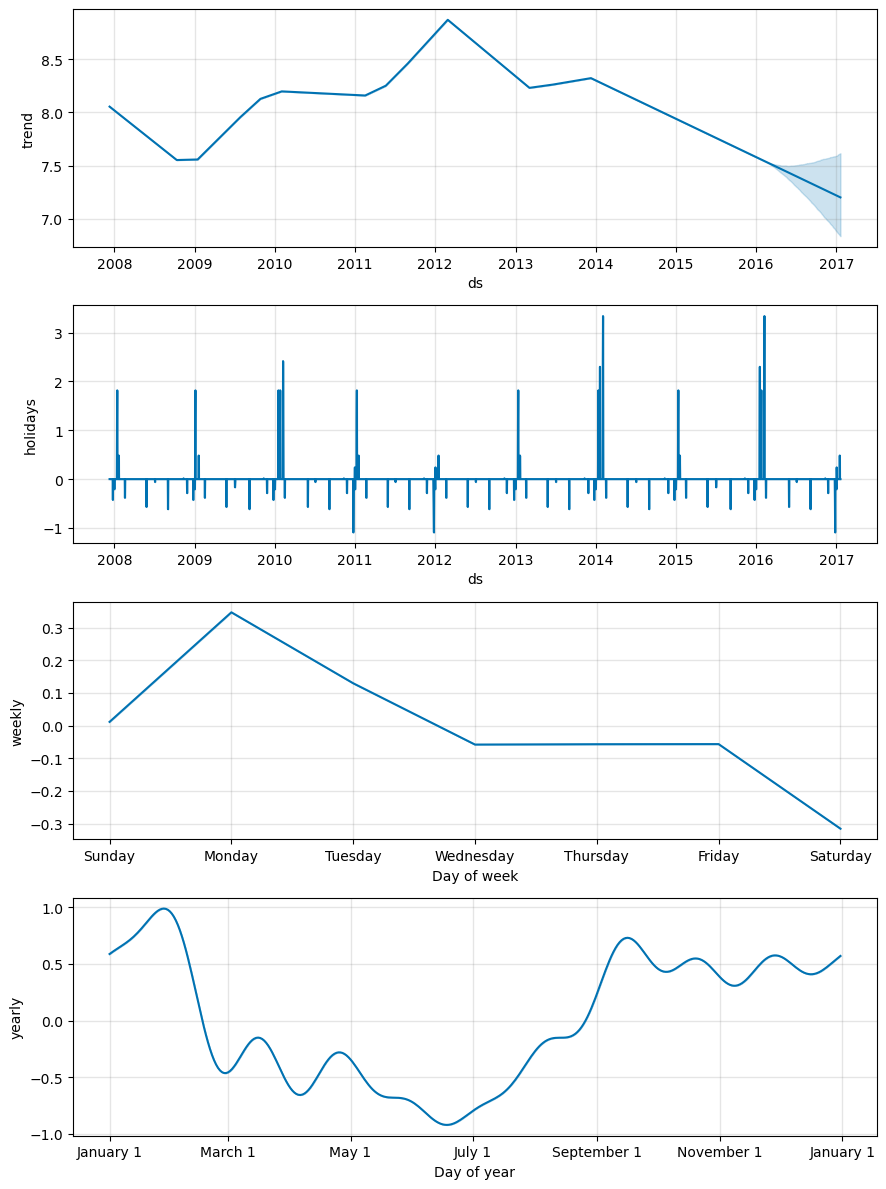

In [54]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Alt Bölümler için Tatiller</h2>
    <strong>make_holidays_df</strong> yardımcı fonksiyonu, belirli eyaletler gibi alt bölümler için özel tatil veri çerçeveleri (<strong>DataFrame</strong>) oluşturmayı kolaylaştırır. 🏙️ Bu işlem için holidays paketinden alınan veriler kullanılabilir. Oluşturulan veri çerçevesi, doğrudan <strong>Prophet()</strong> yapıcısına aktarılabilir. 📊
</font>

In [55]:
# Python
from prophet.make_holidays import make_holidays_df

nsw_holidays = make_holidays_df(
    year_list=[2019 + i for i in range(10)], country='AU', province='NSW'
)
nsw_holidays.head(n=10)

,ds,holiday
0,2019-04-19,Good Friday
1,2019-04-22,Easter Monday
2,2019-01-01,New Year's Day
3,2019-01-28,Australia Day
4,2019-04-20,Easter Saturday
5,2019-04-21,Easter Sunday
6,2019-04-25,ANZAC Day
7,2019-10-07,Labor Day
8,2019-06-10,Queen's Birthday
9,2019-12-25,Christmas Day


In [56]:
from prophet import Prophet
m_nsw = Prophet(holidays=nsw_holidays)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Fourier Order ve Mevsimsellik</h2>
    Prophet modelinde, mevsimsel etkiler Fourier dizileri kullanılarak modellenir. Fourier dizisi, bir periyodik sinyali sinüs ve kosinüs fonksiyonlarıyla yaklaşık olarak temsil eder. 🔄 Prophet, bu fonksiyonların bir kısmını kullanarak mevsimsel etkileri tahmin eder. Bu kısmi Fourier toplamı kullanılarak yapılan modellemede, <strong>Fourier Order</strong> parametresi, mevsimsel değişimlerin hızını belirler. ⏱️<br><br>
    <strong>Fourier Order Nedir?</strong> 🤔<br>
    Fourier Order, bir periyodik sinyali modellemek için kullanılan terim sayısını belirtir. 📊 Bu terimler sinüs ve kosinüs dalgalarıdır ve sayıları arttıkça, model daha karmaşık ve hızlı değişen desenleri yakalayabilir.<br><br>
    <strong>Fourier Order’ın Etkisi:</strong> ⚡<br>
    <ul>
        <li><strong>Düşük Fourier Order</strong>: Daha az terim kullanıldığında, model daha yavaş değişen ve daha genel mevsimsel desenleri yakalar.</li>
        <li><strong>Yüksek Fourier Order</strong>: Daha fazla terim kullanıldığında, model daha hızla değişen ve daha karmaşık mevsimsel desenleri öğrenebilir.</li>
    </ul>
    Ancak, Fourier Order'ı çok fazla artırmak, modelin aşırı uyum (overfitting) yapmasına yol açabilir. Bu da modelin eğitim verisine çok iyi uyum sağlamasına, ancak yeni verilerle iyi genellememesine neden olabilir. ⚠️
</font>

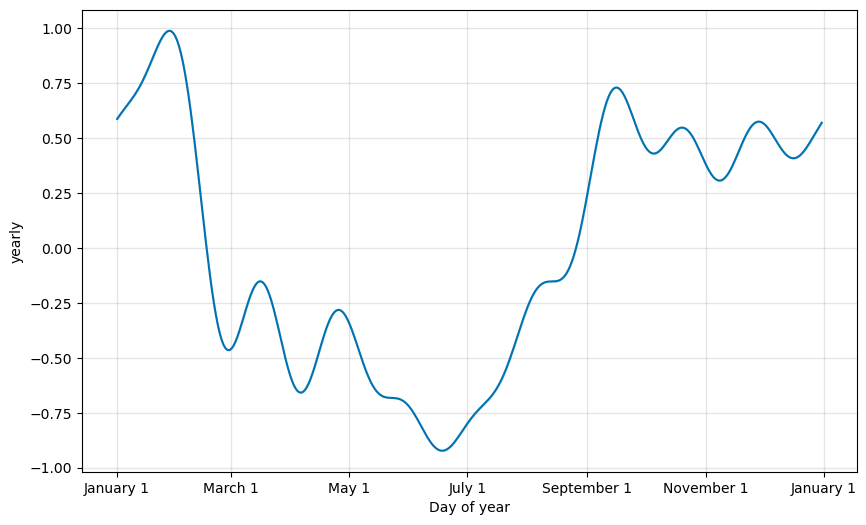

In [57]:
from prophet.plot import plot_yearly
a = plot_yearly(m)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <ul>
        <li><strong>Varsayılan Fourier Order</strong> 10'dur.</li>
        <li>Bu, modelin yıllık mevsimselliği 10 terimle modellemesine olanak tanır.</li>
        <li>Sonuç olarak, model genel mevsimsel eğilimleri yakalar ancak hızlı değişen desenleri göz ardı eder.</li>
    </ul>
</font>

02:15:19 - cmdstanpy - INFO - Chain [1] start processing
02:15:19 - cmdstanpy - INFO - Chain [1] done processing


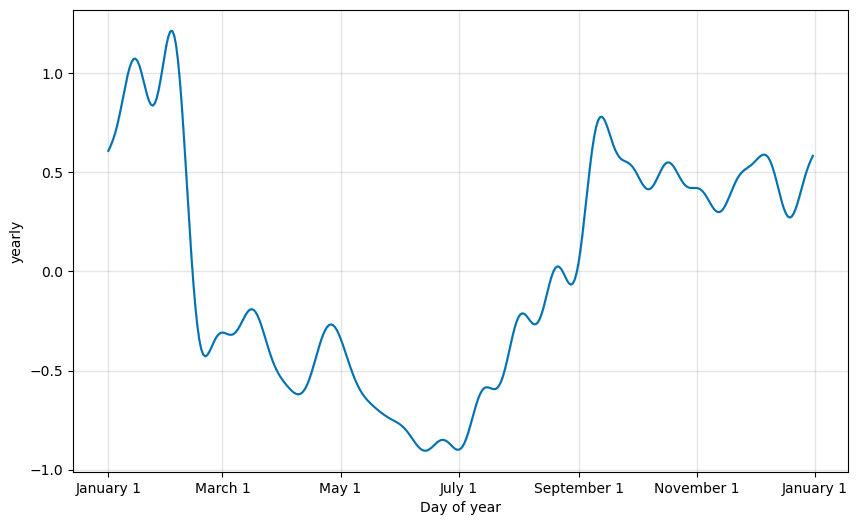

In [66]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <ul>
        <li><strong>Burada Fourier Order</strong> 20 olarak ayarlanmıştır.</li>
        <li>Bu, modelin daha fazla terim kullanarak yıllık mevsimsel desenleri daha hızlı değişen ve daha detaylı bir şekilde modellemesini sağlar.</li>
        <li>Ancak, Fourier Order arttıkça modelin aşırı uyum yapma riski de artar.</li>
    </ul>
</font>

<h2 style="font-family: Arial, sans-serif; margin-bottom: 10px;">Özel Mevsimsel Düzenlemeler Belirleme<h2>
<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
Prophet, zaman serisinin iki döngüden uzun olduğu durumlarda, varsayılan olarak haftalık (weekly) ve yıllık (yearly) mevsimsellikleri otomatik olarak uygular.
Eğer zaman serisi alt-günlük (sub-daily) bir yapıya sahipse, günlük (daily) mevsimsellik de fit edilir.
Ancak, başka türde mevsimsel düzenlemeler (örneğin, aylık (monthly), üç aylık (quarterly) veya saatlik (hourly)) eklemek isterseniz, <strong>add_seasonality</strong> metodunu kullanarak bunları kolayca modelinize dahil edebilirsiniz.
fonksiyonu üç ana parametre alır:
    <ul>
                <li><strong>Ad (name)</strong>: Eklemek istediğiniz mevsimsel bileşenin adı.</li>
                <li><strong>Dönem (period)</strong>: Mevsimselliğin bir döngüsünün süresi, bu süre gün cinsinden belirtilir.</li>
                <li><strong>Fourier sırası (Fourier order)</strong>: Mevsimselliğin karmaşıklığını belirleyen bir parametredir. Yüksek Fourier sırası, daha fazla dalgalanma ve detaylı bir model sağlar.</li>
            </ul>
    <strong>Varsayılan olarak, Prophet:</strong>
    <ul>
        <li>Haftalık (weekly) mevsimsellik için 3 Fourier sırası kullanır.</li>
        <li>Yıllık (yearly) mevsimsellik için ise 10 Fourier sırası kullanır.</li>
    </ul>
    Ek olarak, <strong>add_seasonality</strong> fonksiyonu, mevsimsel bileşenin <strong>öncelikli ölçeği (prior scale)</strong> gibi isteğe bağlı bir parametreyi de alabilir. Bu parametre, mevsimsel etkilerin gücünü kontrol eder ve modelin genel eğilimini etkileyebilir. Bu özellik, daha karmaşık ve hassas mevsimsel analizler yapmak için kullanışlıdır.
</font>

01:48:44 - cmdstanpy - INFO - Chain [1] start processing
01:48:44 - cmdstanpy - INFO - Chain [1] done processing


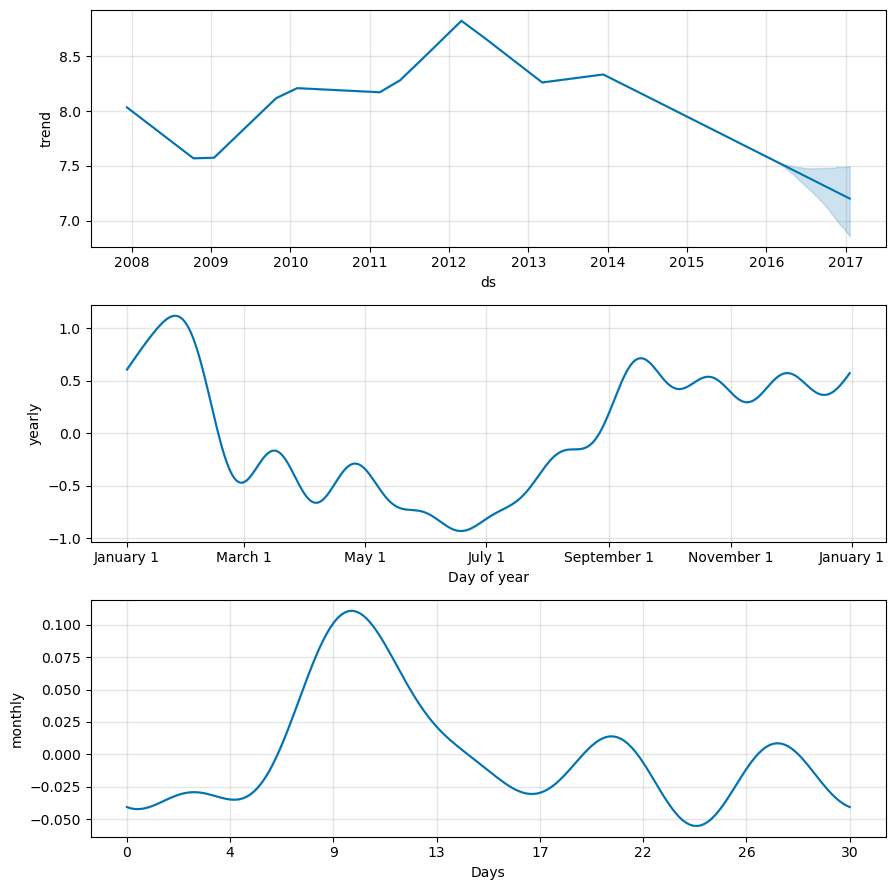

In [62]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2 style="font-size: 1.5em; margin-bottom: 10px;">Koşullu Sezonlukları Kullanarak Mevsimsel Paternleri Geliştirmek</h2>
    <p>Prophet modeli, zaman serilerindeki mevsimsel etkileri tahmin etmek için esnek bir araçtır. Ancak bazı durumlarda, mevsimsel paternlerin diğer faktörlere bağlı olarak değiştiğini gözlemleyebiliriz. Örneğin:</p>
    <ul>
        <li>Yaz mevsimindeki haftalık sezonluk etkiler, kış mevsimindekinden farklı olabilir.</li>
        <li>Haftanın hafta içi ve hafta sonu günlerindeki günlük paternler değişebilir.</li>
    </ul>
    <p>Bu gibi durumlarda, koşullu sezonluklar kullanarak mevsimsel paternleri daha doğru bir şekilde modelleyebiliriz. Prophet'in sunduğu bu esneklik, farklı dönemlere veya koşullara özel sezonluk etkiler tanımlamamıza olanak tanır.</p>
</font>

> **Koşullu Sezonluk Örneği: NFL Sezonu**
> 
> NFL sezonunda (Eylül - Ocak), Pazar günleri oynanan maçlar nedeniyle talepte ciddi bir artış olabilir. Ancak, sezon dışında (Şubat - Ağustos), bu patern kaybolabilir.
> Varsayılan Prophet modeli, yıl boyunca sabit bir haftalık sezonluk etkisi varsayar. Ancak bu durumda, sezon içi ve sezon dışı için ayrı ayrı sezonluk etkiler tanımlamak daha doğru olacaktır.


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
   İlk olarak, her bir tarihin "on-season" (sezon içi) mi yoksa "off-season" (sezon dışı) mı olduğunu belirten bir boolean (doğru/yanlış) sütunu veri çerçevesine ekleriz:
</font>

In [67]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
   Sonrasında, yerleşik <strong>weekly seasonality</strong> (haftalık mevsimsellik) devre dışı bırakılır ve yerine, koşul sütunlarına dayalı iki ayrı <strong>weekly seasonality</strong> eklenir. Bu, mevsimselliğin yalnızca <strong>condition_name</strong> sütununda <strong>True</strong> olan tarihlere uygulanacağı anlamına gelir. Yani, <strong>on-season</strong> (sezon içi) ve <strong>off-season</strong> (sezon dışı) gibi farklı koşullar altında mevsimsellikler hesaplanır. Ayrıca, tahmin yapmak için kullandığımız <strong>dataframe</strong>'e de bu sütunun eklenmesi gerekir. Bu sayede, model doğru koşul bazında mevsimsellikleri uygulayabilir.
</font>


02:16:50 - cmdstanpy - INFO - Chain [1] start processing
02:16:51 - cmdstanpy - INFO - Chain [1] done processing


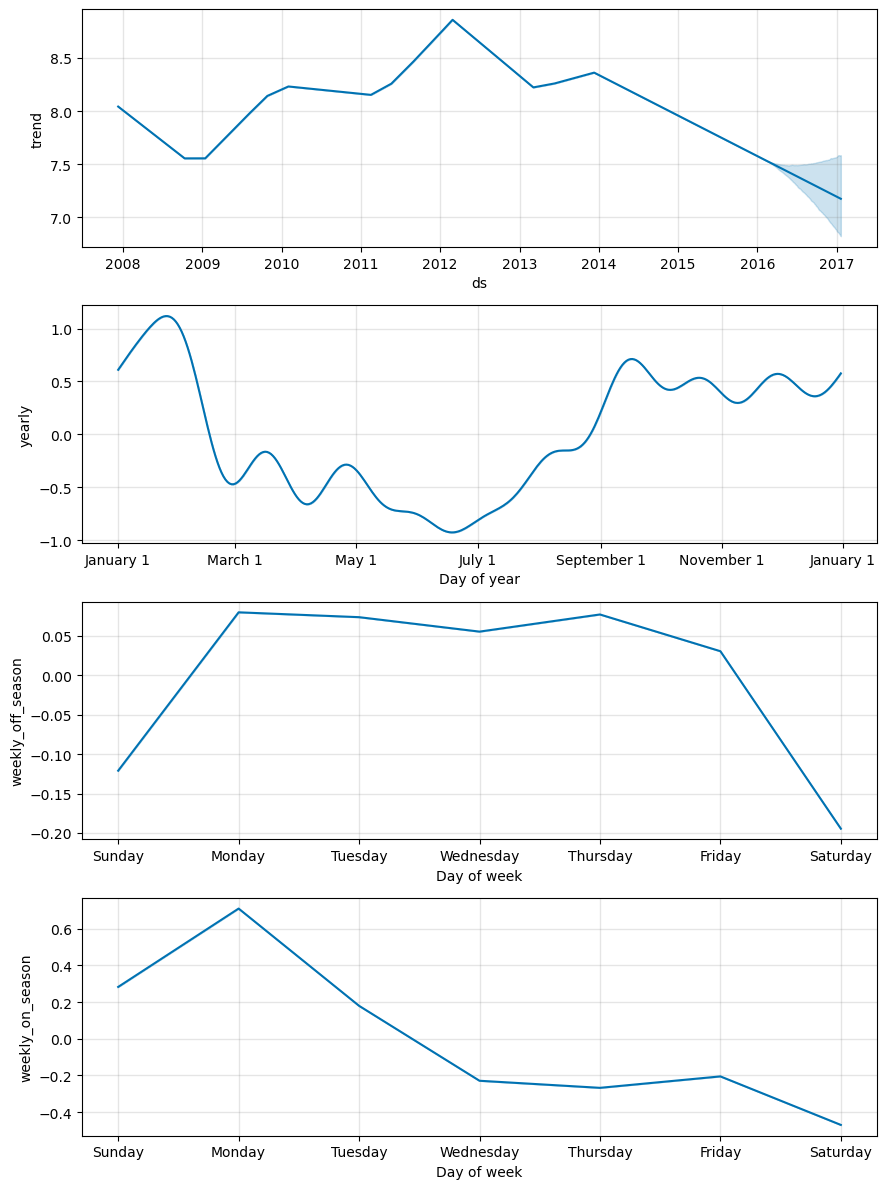

In [68]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
   Her iki mevsimsellik de artık yukarıdaki bileşen grafiklerinde görünüyor. <strong>On-season</strong> (sezon içi) sırasında, her <strong>Pazar</strong> maçlar oynandığında, <strong>Pazar</strong> ve <strong>Pazartesi</strong> günlerinde büyük artışlar gözlemlenir, ancak bu artışlar <strong>off-season</strong> (sezon dışı) döneminde tamamen yoktur.
</font>

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
   <h2 style="font-size: 1.5em; margin-bottom: 10px;">Tatil ve mevsimsellik için prior scale (önceden belirlenmiş ölçek)</h2><br>
   Eğer tatillerin aşırı uyum sağladığını fark ederseniz, <strong>holidays_prior_scale</strong> parametresini kullanarak tatil etkilerini yumuşatabilirsiniz. Varsayılan olarak bu parametre 10’dur ve bu değer çok az bir <strong>regularization</strong> (düzenleme) sağlar. Bu parametreyi düşürmek, tatil etkilerini hafifletir:
</font>

In [74]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

06:08:18 - cmdstanpy - INFO - Chain [1] start processing
06:08:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,playoff,superbowl
2190,2014-02-02,1.214551,0.964552
2191,2014-02-03,1.846591,0.991288
2532,2015-01-11,1.214551,0.000000
2533,2015-01-12,1.846591,0.000000
2901,2016-01-17,1.214551,0.000000
2902,2016-01-18,1.846591,0.000000
2908,2016-01-24,1.214551,0.000000
2909,2016-01-25,1.846591,0.000000
2922,2016-02-07,1.214551,0.964552
2923,2016-02-08,1.846591,0.991288


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
   Tatil etkisinin büyüklüğü, özellikle en az gözlemi yapılan <strong>Superbowl</strong>'lar için önceye göre azaltılmıştır. Benzer şekilde, <strong>seasonality_prior_scale</strong> parametresi, mevsimsellik modelinin veriye ne kadar uyum sağlayacağını ayarlayan bir parametre olarak bulunur.<br><br>
    Önceden belirlenmiş ölçekler, <strong>holidays dataframe</strong> (tatil veri çerçevesi) içerisine bir <strong>prior_scale</strong> sütunu ekleyerek her bir tatil için ayrı ayrı ayarlanabilir. Bireysel mevsimsellikler için önceden belirlenmiş ölçekler, <strong>add_seasonality</strong> fonksiyonuna bir argüman olarak da verilebilir. Örneğin, sadece haftalık mevsimsellik için önceden belirlenmiş ölçek şu şekilde ayarlanabilir:
</font>

In [ ]:
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    <h2 style="font-size: 1.5em; margin-bottom: 10px;" >Ekstra Regresyonlar</h2><br>
    Ekstra regresyonlar, modelin lineer kısmına <strong>add_regressor</strong> metodu kullanılarak eklenebilir. Bu regresyon değerini içeren bir sütun, hem eğitim (fitting) hem de tahmin (prediction) veri çerçevelerinde bulunmalıdır. Örneğin, NFL sezonunda Pazar günleri üzerinde ek bir etki ekleyebiliriz. Bu etki, components grafiğinde <strong>'extra_regressors'</strong> başlığı altında gösterilecektir.
</font>


06:28:30 - cmdstanpy - INFO - Chain [1] start processing
06:28:31 - cmdstanpy - INFO - Chain [1] done processing


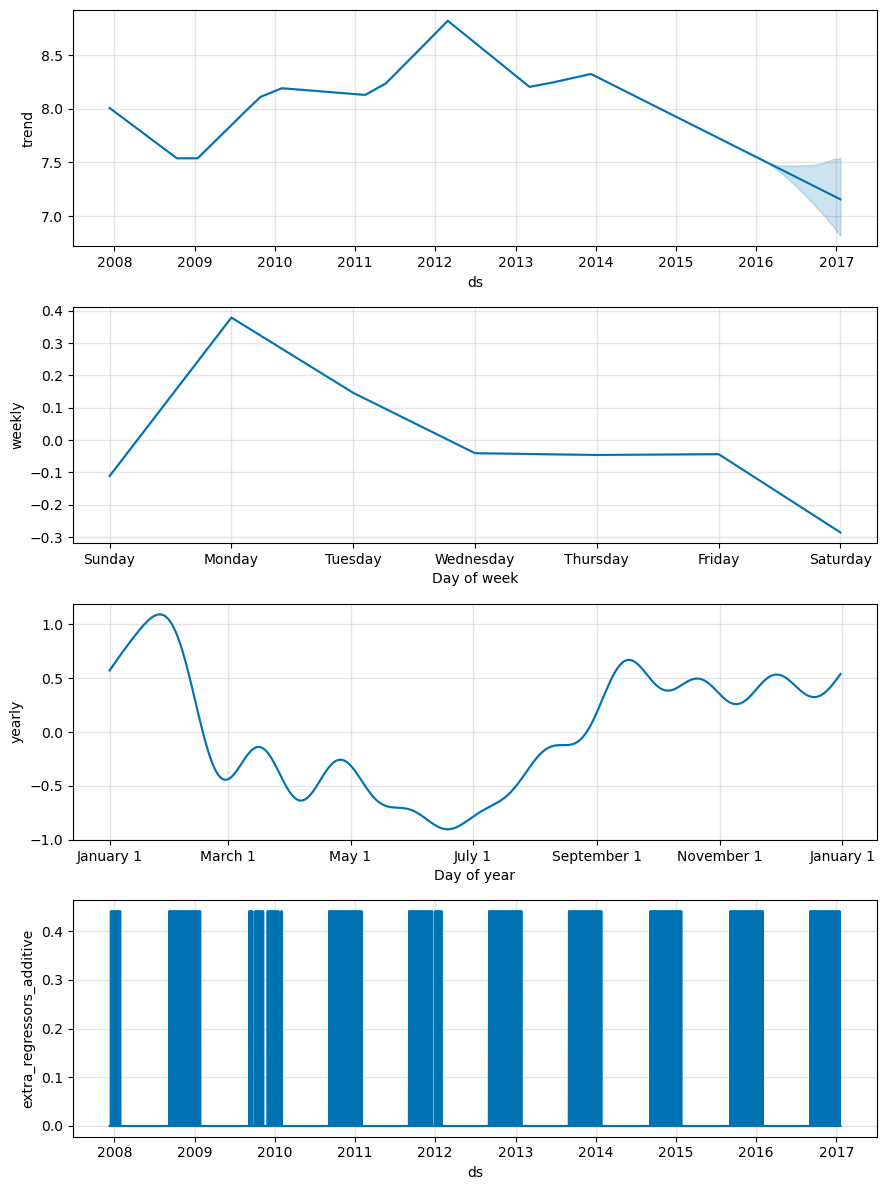

In [77]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
    NFL Pazar günleri, yukarıda açıklanan <strong>"holidays"</strong> arayüzü kullanılarak da ele alınabilirdi; bu durumda geçmiş ve gelecekteki NFL Pazar günlerinin bir listesi oluşturulurdu. <strong>add_regressor</strong> fonksiyonu ise ek linear regressors (doğrusal regresyonlar) tanımlamak için daha genel bir arayüz sunar ve özellikle regresörün bir binary indicator (ikili gösterge) olmasını zorunlu kılmaz. Başka bir time series (zaman serisi) de regresör olarak kullanılabilir, ancak gelecekteki değerlerinin bilinmesi gerekir.
</font>